Задача 1.

In [39]:
import numpy as np
P = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
x = np.zeros((20000,3))
a=np.array(((0.6), (0.3), (0.1)))
a.reshape(3,1)
print(a)
x[0]=a
for i in range(1, 20000):
    x[i]=np.dot( x[i-1],P)
print(x)
state_wheather = ("sunny", "cloudy", "rainy")
states = []
for i in range(0, 20000):
    states.append(np.random.choice(state_wheather,p=x[i]))
print(states)

[0.6 0.3 0.1]
[[0.6        0.3        0.1       ]
 [0.47       0.33       0.2       ]
 [0.421      0.333      0.246     ]
 ...
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]
['rainy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'rainy', 'rainy', 'sunny', 'rainy', 'sunny', 'sunny', 'cloudy', 'rainy', 'sunny', 'cloudy', 'sunny', 'sunny', 'rainy', 'cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'rainy', 'sunny', 'cloudy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny', 'cloudy', 'rainy', 'sunny', 'cloudy', 'sunny', 'cloudy', 'rainy', 'sunny', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'sunny', 'sunny', 'rainy', 'rainy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', '

Задача 2.

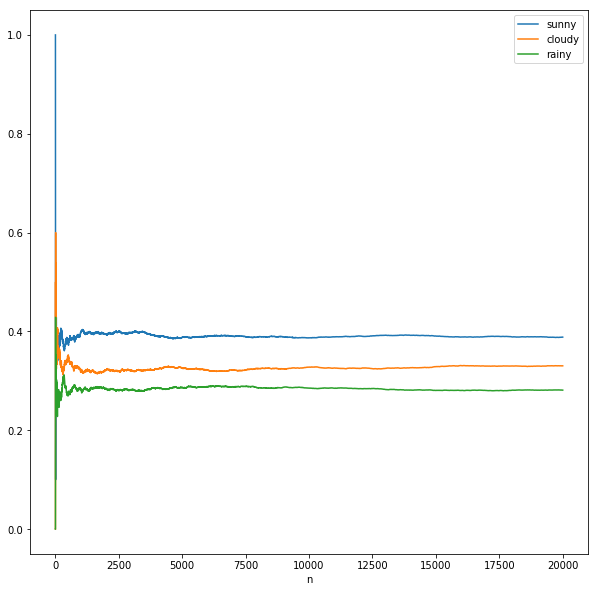

In [46]:
import matplotlib.pyplot as plt
tort=np.arange(20000)
tort=tort+1
r1=[1]
r2=[0]
r3=[0]
for i in range (1,20000):
        q=states[i]
        if q=="sunny":
            r1.append(r1[i-1]+1)
            r2.append(r2[i-1])
            r3.append(r3[i-1])
        if q=="cloudy":
            r2.append(r2[i-1]+1)
            r1.append(r1[i-1])
            r3.append(r3[i-1])
        if q=="rainy":
            r3.append(r3[i-1]+1)
            r1.append(r1[i-1])
            r2.append(r2[i-1])
lul=1/tort
r1=r1*lul
r2=r2*lul
r3=r3*lul
plt.figure(figsize=(10, 10))
plt.plot(tort,r1,label="sunny")
plt.plot(tort,r2,label="cloudy")
plt.plot(tort,r3,label="rainy")
plt.legend()
plt.xlabel('n')
plt.show()
#plt.plot(tort,r2,label="cloudy")
#plt.show()
#plt.plot(tort,r3,label="cloudy")
#plt.show()

Задача 3.проверка

In [51]:
print(x[19999])
print(np.dot( x[19999],P))
A=P
for i in range(100):
    A=np.dot(A,P)
print(A)

[0.38888889 0.33333333 0.27777778]
[0.38888889 0.33333333 0.27777778]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


Задача 4. МСМС

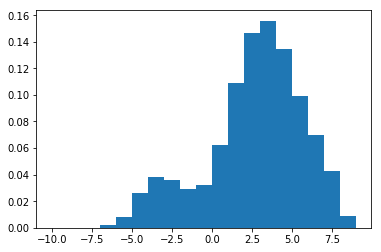

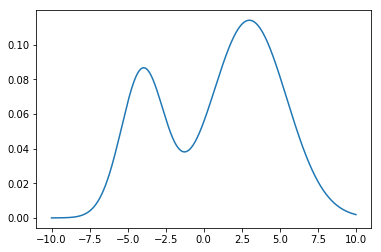

In [59]:
from scipy.stats import norm
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10)%21-10
rur = metroplis(0, value, proposal, 1000)

plt.hist(rur, bins=np.arange(-10,10),  density=True)
plt.show()

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()